In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import copy

In [2]:
X = pd.read_csv(r'C:\Users\akash\Desktop\ML\Car\carInsurance_train.csv')

In [3]:
X.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.9+ KB


In [5]:
X.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [6]:
cat_col_names=X.iloc[:,1:].select_dtypes(include=['object'])
cat_var=list(cat_col_names.columns)
for i in cat_var:
    print(cat_col_names[i].value_counts())  

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64
married     2304
single      1213
divorced     483
Name: Marital, dtype: int64
secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64
cellular     2831
telephone     267
Name: Communication, dtype: int64
may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: LastContactMonth, dtype: int64
failure    437
success    326
other      195
Name: Outcome, dtype: int64
17:11:04    3
15:48:27    3
11:48:25    3
10:42:44    3
13:54:34    3
           ..
14:17:16    1
11:24:06    1
14:21:52    1
11:37:55    1
13:12:23    1
Name: CallStart, Length: 3777, dtype: int64
10:52:24    3
10:22:30    3
11:27:46    3
17:45:23    2
12:1

In [7]:
X.drop('Id', axis=1, inplace=True)
X.drop('CallStart', axis=1, inplace=True)
X.drop('CallEnd', axis=1, inplace=True)
X.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,0
1,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,0
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,1
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,0


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'count')

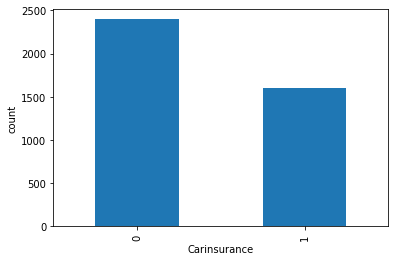

In [8]:
plt =X.CarInsurance.value_counts().plot("bar")
plt.set_xlabel("Carinsurance")
plt.set_ylabel("count")

In [9]:
X['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

C:\Users\akash\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\akash\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


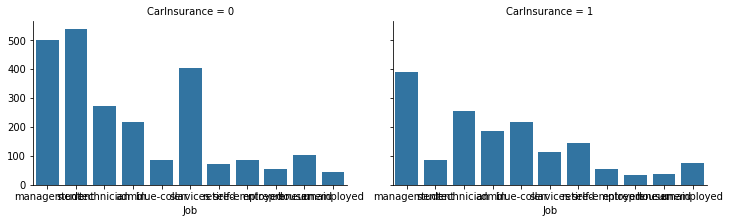

In [10]:
grid = sns.FacetGrid(X,col='CarInsurance', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Job');

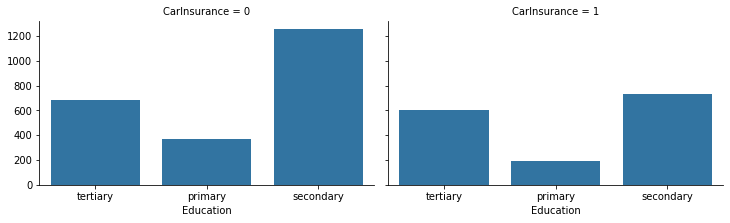

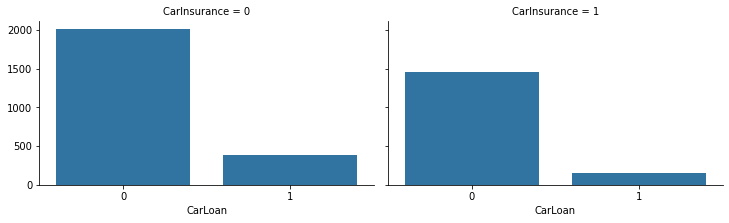

In [11]:
grid = sns.FacetGrid(X,col='CarInsurance', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');
grid = sns.FacetGrid(X,col='CarInsurance', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'CarLoan');

In [12]:
X.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CarInsurance           0
dtype: int64

In [13]:
cat_data = []
num_data = []

for i,c in enumerate(X.dtypes):
    if c == object:
        cat_data.append(X.iloc[:, i])
    else :
        num_data.append(X.iloc[:, i])

In [14]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [15]:
cat_data.head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,management,single,tertiary,telephone,jan,NaN
1,blue-collar,married,primary,NaN,may,NaN
2,management,single,tertiary,cellular,jun,failure
3,student,single,primary,cellular,may,NaN
4,management,married,tertiary,cellular,jun,NaN


In [16]:
num_data.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32,0,1218,1,0,28,2,-1,0,0
1,32,0,1156,1,0,26,5,-1,0,0
2,29,0,637,1,0,3,1,119,1,1
3,25,0,373,1,0,11,2,-1,0,1
4,30,0,2694,0,0,3,1,-1,0,0


In [17]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() 

False

In [18]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
num_data.isnull().sum()

Age               0
Default           0
Balance           0
HHInsurance       0
CarLoan           0
LastContactDay    0
NoOfContacts      0
DaysPassed        0
PrevAttempts      0
CarInsurance      0
dtype: int64

In [19]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,4,2,2,1,4,0
1,1,1,0,0,8,0
2,4,2,2,0,6,0
3,8,2,0,0,8,0
4,4,1,2,0,6,0


In [20]:
Y = num_data['CarInsurance']
num_data.drop('CarInsurance', axis=1, inplace=True)


In [21]:
X = pd.concat([cat_data, num_data], axis=1)
X.head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts
0,4,2,2,1,4,0,32,0,1218,1,0,28,2,-1,0
1,1,1,0,0,8,0,32,0,1156,1,0,26,5,-1,0
2,4,2,2,0,6,0,29,0,637,1,0,3,1,119,1
3,8,2,0,0,8,0,25,0,373,1,0,11,2,-1,0
4,4,1,2,0,6,0,30,0,2694,0,0,3,1,-1,0


In [22]:
X.drop(['Age','Outcome','DaysPassed'], axis=1, inplace=True)
X.head()

,Job,Marital,Education,Communication,LastContactMonth,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,PrevAttempts
0,4,2,2,1,4,0,1218,1,0,28,2,0
1,1,1,0,0,8,0,1156,1,0,26,5,0
2,4,2,2,0,6,0,637,1,0,3,1,1
3,8,2,0,0,8,0,373,1,0,11,2,0
4,4,1,2,0,6,0,2694,0,0,3,1,0


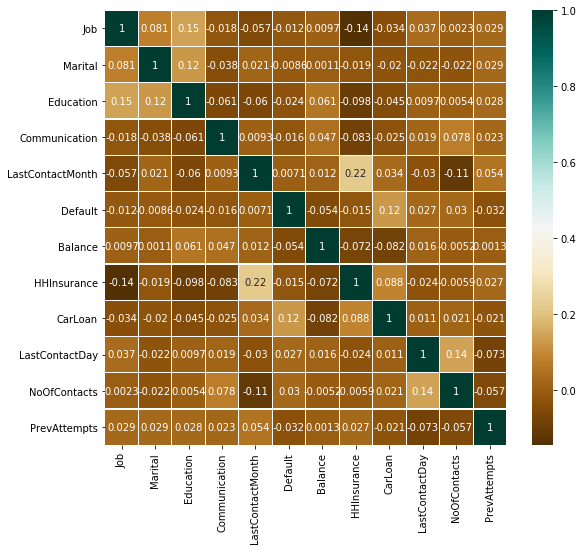

In [23]:
corr_matrix = X.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix,cmap="BrBG",annot=True,linewidths=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
x_training,x_valid,y_training,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
logreg_clf = LogisticRegression()
logreg_clf.fit(x_training,y_training)
prediction=logreg_clf.predict(x_valid)
accuracy_score(y_test,prediction)
confuse=confusion_matrix(y_test,prediction,labels=[1,0])
print(confuse)
report=classification_report(y_test,prediction)
print(report)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[211 256]
 [134 599]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       733
           1       0.61      0.45      0.52       467

    accuracy                           0.68      1200
   macro avg       0.66      0.63      0.64      1200
weighted avg       0.67      0.68      0.66      1200



In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    #'LinearRegression':LinearRegression(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [27]:
def train_eval_train(models, X, Y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, Y)
        loss(Y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, x_training, y_training)

LogisticRegression :
  pre: 0.612
  rec: 0.450
  f1: 0.519
  loss: 11.719
  acc: 0.661
------------------------------
KNeighborsClassifier :


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


  pre: 0.669
  rec: 0.566
  f1: 0.614
  loss: 10.004
  acc: 0.710
------------------------------
SVC :


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


  pre: 0.998
  rec: 0.970
  f1: 0.984
  loss: 0.444
  acc: 0.987
------------------------------
DecisionTreeClassifier :
  pre: 0.504
  rec: 0.637
  f1: 0.563
  loss: 13.877
  acc: 0.598
------------------------------
